<a href="https://colab.research.google.com/github/yucheng880730/AI_Pytorch/blob/main/AI_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Import

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train_all_0.csv to train_all_0 (2).csv


In [3]:
cols = ['feature1','feature2', 'feature3', 'feature4', 'feature5','feature6'
           ,'feature7','feature8','feature9','feature10','feature11','feature12','target']
df = pd.read_csv('train_all_0.csv',names=cols)
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,target
0,-0.002390,-0.002091,0.001010,-0.002171,0.000091,0.000114,0.000548,0.000718,0.000021,0.000004,0.001011,0.000984,0
1,-0.002484,-0.002170,0.000752,0.000790,0.000086,0.000113,0.000554,0.000679,0.000020,0.000003,0.001013,0.000981,0
2,-0.002752,-0.002469,0.000998,0.002989,0.000087,0.000114,0.000555,0.000621,0.000021,0.000004,0.001038,0.000988,0
3,-0.002925,-0.002657,0.001240,0.003282,0.000092,0.000116,0.000563,0.000485,0.000026,0.000006,0.001069,0.001009,1
4,-0.003050,-0.002783,0.001476,0.000550,0.000090,0.000116,0.000602,0.000446,0.000026,0.000007,0.001051,0.001009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-0.001887,-0.001211,0.000661,-0.000645,0.001544,0.001539,0.000090,0.000369,0.001451,0.000685,0.001134,0.001385,1
476,-0.001840,-0.001211,0.000724,-0.000030,0.001526,0.001546,0.000089,0.000272,0.001480,0.000644,0.001229,0.001433,1
477,-0.002028,-0.001431,0.000122,0.002421,0.001551,0.001550,0.000089,0.000233,0.001513,0.000688,0.001356,0.001481,1
478,-0.001761,-0.001289,0.000528,0.000795,0.001549,0.001558,0.000090,0.000233,0.001557,0.000923,0.001439,0.001572,1


In [4]:
# create tensor from df
torch_tensor = torch.tensor(df.values)
torch_tensor

tensor([[-2.3899e-03, -2.0912e-03,  1.0095e-03,  ...,  1.0108e-03,
          9.8368e-04,  0.0000e+00],
        [-2.4843e-03, -2.1698e-03,  7.5231e-04,  ...,  1.0131e-03,
          9.8069e-04,  0.0000e+00],
        [-2.7516e-03, -2.4686e-03,  9.9830e-04,  ...,  1.0382e-03,
          9.8835e-04,  0.0000e+00],
        ...,
        [-2.0283e-03, -1.4308e-03,  1.2189e-04,  ...,  1.3561e-03,
          1.4813e-03,  1.0000e+00],
        [-1.7610e-03, -1.2893e-03,  5.2797e-04,  ...,  1.4390e-03,
          1.5723e-03,  1.0000e+00],
        [-1.6981e-03, -1.3522e-03,  3.1712e-04,  ...,  1.2852e-03,
          1.5457e-03,  1.0000e+00]], dtype=torch.float64)

In [5]:
torch_tensor.size()

torch.Size([480, 13])

# Data preprocessing

In [6]:
# delete last column
feature_tensor = torch_tensor[:,:-1]
target_tensor = torch_tensor[:,-1]
feature_tensor.size(), target_tensor.size()

(torch.Size([480, 12]), torch.Size([480]))

In [7]:
train_X,valid_X,test_X = torch.split(feature_tensor, [384,48,48])
train_y,valid_y,test_y = torch.split(target_tensor, [384,48,48])
print(train_X.size(),valid_X.size(),test_X.size())
print(train_y.size(),valid_y.size(),test_y.size())

torch.Size([384, 12]) torch.Size([48, 12]) torch.Size([48, 12])
torch.Size([384]) torch.Size([48]) torch.Size([48])




---





# KNN

In [8]:
def KNN(train_X,train_y, test_X, test_y, k):

  # n = 384 m = 96 
  n = train_X.size(0)
  m = test_X.size(0)  

  # caculate distance
  xx = (test_X**2).sum(dim=1, keepdim=True).expand(m, n)
  yy = (train_X**2).sum(dim=1, keepdim=True).expand(n, m).transpose(0,1)

  dist_mat = xx + yy - 2*test_X.matmul(train_X.transpose(0,1))
  dist_mat = dist_mat.argsort(dim=-1)
  # print(f'dist_mat.shape = {dist_mat.shape}')

  res = []
  for idxs in dist_mat:
    # print(np.array([train_y[idx] for idx in idxs[:k]], dtype = "int"))
    # print(np.bincount(np.array([train_y[idx] for idx in idxs[:k]], dtype = "int")))
    res.append(np.bincount(np.array([train_y[idx] for idx in idxs[:k]], dtype = "int")).argmax())

  
  assert len(res) == len(test_y)
  print("k = %d, acc = %f: "%(k, np.mean(np.array(test_y) == res)))

In [9]:
for k in range(2,50):
    a = KNN(train_X, train_y, test_X, test_y, k)

k = 2, acc = 0.458333: 
k = 3, acc = 0.625000: 
k = 4, acc = 0.604167: 
k = 5, acc = 0.666667: 
k = 6, acc = 0.583333: 
k = 7, acc = 0.666667: 
k = 8, acc = 0.645833: 
k = 9, acc = 0.666667: 
k = 10, acc = 0.625000: 
k = 11, acc = 0.666667: 
k = 12, acc = 0.625000: 
k = 13, acc = 0.645833: 
k = 14, acc = 0.604167: 
k = 15, acc = 0.645833: 
k = 16, acc = 0.625000: 
k = 17, acc = 0.666667: 
k = 18, acc = 0.625000: 
k = 19, acc = 0.666667: 
k = 20, acc = 0.625000: 
k = 21, acc = 0.729167: 
k = 22, acc = 0.708333: 
k = 23, acc = 0.729167: 
k = 24, acc = 0.708333: 
k = 25, acc = 0.750000: 
k = 26, acc = 0.729167: 
k = 27, acc = 0.750000: 
k = 28, acc = 0.750000: 
k = 29, acc = 0.854167: 
k = 30, acc = 0.833333: 
k = 31, acc = 0.854167: 
k = 32, acc = 0.854167: 
k = 33, acc = 0.895833: 
k = 34, acc = 0.895833: 
k = 35, acc = 0.895833: 
k = 36, acc = 0.895833: 
k = 37, acc = 0.916667: 
k = 38, acc = 0.916667: 
k = 39, acc = 0.958333: 
k = 40, acc = 0.937500: 
k = 41, acc = 0.979167: 
k = 42, 



---



# Training_Function
function for SVM, Softmax, Two-layer neural network classifier


In [10]:
def training_function(epochs, optimizer, model, loss_fn, train_X, valid_X, 
                  train_y, valid_y):
    validatation_loss = []
    for epoch in range(epochs + 1):
      
        train_X_predict = model(train_X.float())        
        loss_train = loss_fn(train_X_predict, train_y)

        valid_X_predict = model(valid_X.float())
        loss_valid = loss_fn(valid_X_predict, valid_y)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 100 == 0:
            
            output_test = (train_X_predict > 0.5).float()
            output_valid = (valid_X_predict>0.5).float()

            correct_test = (output_test == train_y).float().sum()
            correct_test = correct_test/train_X.shape[0]

            correct_valid = (output_valid == valid_y).float().sum()
            correct_valid = correct_valid/valid_X.shape[0]

            validatation_loss.append(loss_valid.item())
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_valid.item():.4f}")

            print("train accuracy is %f"%(correct_test))
            print("valid accuracy is %f"%(correct_valid))


    plt.plot(validatation_loss)
    plt.xlabel('Iteration number')
    plt.ylabel('Loss value')
    plt.title('validation loss')
    plt.show()

# Optimizer
using SGD

In [11]:
def optimizer(model):
  optimizer = optim.SGD(model.parameters(), lr=1e-3)
  return optimizer

# Change Type
from double to float

In [12]:
train_X = train_X.float()
train_y = train_y.float()
print(train_X.type())
print(train_y.type())

torch.FloatTensor
torch.FloatTensor


# Accuracy
test the accuracy of model


In [13]:
def accuracy(model, i):
  test_predict = model(test_X.float())
  test_output = (test_predict>0.5).float()
  test_model = test_y.unsqueeze(1)

  correctModel = (test_output == test_model)[:,i].float().sum()
  print("correct number is %d"%correctModel)

  correctModel = correctModel / test_X.shape[0]
  print("test accuracy is %f"%(correctModel))



---



# SVM





In [14]:
import torch.nn as nn
import torch.optim as optim
SVM = nn.Sequential(
            nn.Linear(12,2), 
            )
model_SVM = SVM

# SVM Loss Function

In [15]:
def hinge_loss(train_X_predict, train_y): 
    
    # define loss function
    labels = train_y.numpy().astype(int)
    num_labels = len(train_y) #384
    corrects = train_X_predict[range(num_labels), labels].unsqueeze(0).T
    corrects = corrects.unsqueeze(0)
    
    # 最大間隔
    margin = 1.0
    margins = train_X_predict - corrects + margin
    loss = torch.sum(torch.max(margins, 1)[0]) / len(train_y)

    # 正則化强度
    # reg = 1e-3
    # loss += reg * torch.sum(weight ** 2)

    return loss

Epoch 0, Training loss 2.2608, Validation loss 2.3604
train accuracy is 0.458333
valid accuracy is 0.250000
Epoch 1, Training loss 2.2603, Validation loss 2.3596
train accuracy is 0.458333
valid accuracy is 0.250000
Epoch 100, Training loss 2.2022, Validation loss 2.2791
train accuracy is 0.458333
valid accuracy is 0.250000
Epoch 200, Training loss 2.1435, Validation loss 2.1979
train accuracy is 0.458333
valid accuracy is 0.250000
Epoch 300, Training loss 2.0848, Validation loss 2.1166
train accuracy is 0.458333
valid accuracy is 0.250000
Epoch 400, Training loss 2.0261, Validation loss 2.0354
train accuracy is 0.458333
valid accuracy is 0.250000
Epoch 500, Training loss 1.9674, Validation loss 1.9541
train accuracy is 0.458333
valid accuracy is 0.250000
Epoch 600, Training loss 1.9087, Validation loss 1.8728
train accuracy is 0.458333
valid accuracy is 0.250000
Epoch 700, Training loss 1.8500, Validation loss 1.7916
train accuracy is 0.458333
valid accuracy is 0.250000
Epoch 800, Tra

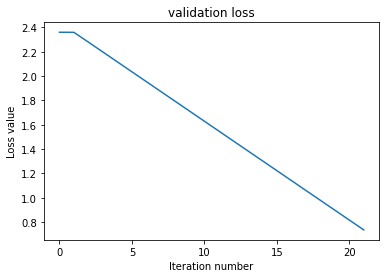

In [16]:
training_function(
    epochs = 2000, 
    optimizer = optimizer(model_SVM),
    model = model_SVM,
    loss_fn = hinge_loss, 
    train_X = train_X,
    train_y = train_y.unsqueeze(1) ,
    valid_X = valid_X,
    valid_y = valid_y.unsqueeze(1))

In [17]:
accuracy(model_SVM, 1)

correct number is 48
test accuracy is 1.000000




---



# SoftMax

In [18]:
Softmax = nn.Sequential(
            nn.Linear(12,1), 
            nn.Softmax(dim=1))
model_Softmax = Softmax

Epoch 0, Training loss 0.5424, Validation loss 0.4383
train accuracy is 0.770833
valid accuracy is 0.875000
Epoch 1, Training loss 0.5424, Validation loss 0.4383
train accuracy is 0.770833
valid accuracy is 0.875000
Epoch 100, Training loss 0.5424, Validation loss 0.4383
train accuracy is 0.770833
valid accuracy is 0.875000
Epoch 200, Training loss 0.5424, Validation loss 0.4383
train accuracy is 0.770833
valid accuracy is 0.875000
Epoch 300, Training loss 0.5424, Validation loss 0.4383
train accuracy is 0.770833
valid accuracy is 0.875000
Epoch 400, Training loss 0.5424, Validation loss 0.4383
train accuracy is 0.770833
valid accuracy is 0.875000
Epoch 500, Training loss 0.5424, Validation loss 0.4383
train accuracy is 0.770833
valid accuracy is 0.875000
Epoch 600, Training loss 0.5424, Validation loss 0.4383
train accuracy is 0.770833
valid accuracy is 0.875000
Epoch 700, Training loss 0.5424, Validation loss 0.4383
train accuracy is 0.770833
valid accuracy is 0.875000
Epoch 800, Tra

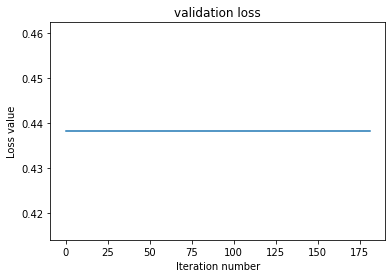

In [19]:
training_function(
    epochs = 18000, 
    optimizer = optimizer(model_Softmax),
    model = model_Softmax,
    loss_fn = nn.BCEWithLogitsLoss(), 
    train_X = train_X,
    train_y = train_y.unsqueeze(1) ,
    valid_X = valid_X,
    valid_y = valid_y.unsqueeze(1))



---



In [20]:
accuracy(model_Softmax, 0)

correct number is 48
test accuracy is 1.000000


# Two-layer neural network classifier

In [21]:
Two_layer = nn.Sequential(
            nn.Linear(12,36), 
            nn.ReLU(),
            nn.Linear(36,1))
model_Twolayer = Two_layer

Epoch 0, Training loss 0.6722, Validation loss 0.6639
train accuracy is 0.229167
valid accuracy is 0.125000
Epoch 1, Training loss 0.6721, Validation loss 0.6637
train accuracy is 0.229167
valid accuracy is 0.125000
Epoch 100, Training loss 0.6610, Validation loss 0.6479
train accuracy is 0.229167
valid accuracy is 0.125000
Epoch 200, Training loss 0.6508, Validation loss 0.6332
train accuracy is 0.229167
valid accuracy is 0.125000
Epoch 300, Training loss 0.6416, Validation loss 0.6196
train accuracy is 0.229167
valid accuracy is 0.125000
Epoch 400, Training loss 0.6331, Validation loss 0.6070
train accuracy is 0.229167
valid accuracy is 0.125000
Epoch 500, Training loss 0.6253, Validation loss 0.5953
train accuracy is 0.229167
valid accuracy is 0.125000
Epoch 600, Training loss 0.6183, Validation loss 0.5844
train accuracy is 0.229167
valid accuracy is 0.125000
Epoch 700, Training loss 0.6118, Validation loss 0.5743
train accuracy is 0.229167
valid accuracy is 0.125000
Epoch 800, Tra

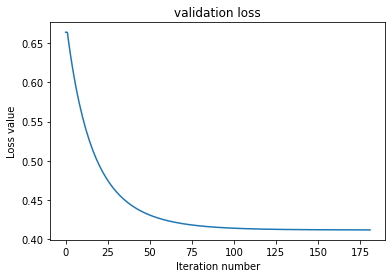

In [22]:
training_function(
    epochs = 18000, 
    optimizer = optimizer(model_Twolayer),
    model = model_Twolayer,
    loss_fn = nn.BCEWithLogitsLoss(), 
    train_X = train_X,
    train_y = train_y.unsqueeze(1) ,
    valid_X = valid_X,
    valid_y = valid_y.unsqueeze(1))

In [23]:
accuracy(model_Twolayer, 0)

correct number is 48
test accuracy is 1.000000
